In [2]:
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import torch
import torch.nn as nn

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
def build_and_train_ann_model(lr, epochs, x, y):
    losses_list = torch.zeros(epochs, device=device)

    model = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    ).to(device)

    loss_func = nn.MSELoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        pred = model(x)

        loss = loss_func(pred, y)
        losses_list[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = model(x)

    return predictions, losses_list

In [4]:
def create_data(m, n):
    x = torch.randn(n, 1, device=device)
    y = m * x + torch.randn(n, 1, device=device) / 2

    return x, y

/home/patryk/miniconda3/envs/pytorch/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/patryk/miniconda3/envs/pytorch/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


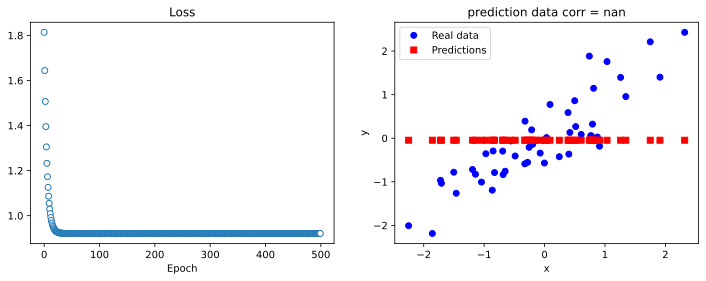

In [5]:
x, y = create_data(m=.8, n=50)
preds, losses = build_and_train_ann_model(lr=.05, epochs=500, x=x, y=y)

preds_cpu = preds.to("cpu")
losses_cpu = losses.to("cpu")
x_cpu = x.to("cpu")
y_cpu = y.to("cpu")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(losses_cpu.detach(), "o", markerfacecolor="w", linewidth=.1)
ax[0].set_xlabel("Epoch")
ax[0].set_title("Loss")

ax[1].plot(x_cpu, y_cpu, "bo", label="Real data")
ax[1].plot(x_cpu, preds_cpu.detach(), "rs", label="Predictions")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title(f"prediction data corr = {np.corrcoef(y_cpu.T, preds_cpu.detach().T)[0, 1]:.2f}")
ax[1].legend()

plt.show()

In [6]:
slopes = np.linspace(-2, 2, 21)

numExps = 50

results = np.zeros((len(slopes), numExps, 2))

for i in range(len(slopes)):
    for j in range(numExps):
        x, y = create_data(m=slopes[i], n=50)
        preds, losses = build_and_train_ann_model(lr=.05, epochs=500, x=x, y=y)

        preds_cpu = preds.to("cpu")
        losses_cpu = losses.to("cpu")
        x_cpu = x.to("cpu")
        y_cpu = y.to("cpu")

        results[i, j, 0] = losses_cpu[-1]
        results[i, j, 1] = np.corrcoef(y_cpu.T, preds_cpu.detach().T)[0, 1]

results[np.isnan(results)] = 0

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(slopes, np.mean(results[:, :, 0], axis=1), "ko-", markerfacecolor="w", markersize=10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(slopes, np.mean(results[:, :, 1], axis=1), "ms-", markerfacecolor="w", markersize=10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real-predicted correlation")
ax[1].set_title("Model performance")

plt.show()